<a href="https://colab.research.google.com/github/2SUBDA/Breakouts/blob/Week3/IST718_Live_Week3_LM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IST718 | 
Live Week 3 - LM - Housing

In [0]:
import pandas as pd 
import numpy as np 
from scipy.stats import uniform 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt 
import seaborn as sns
import requests
import bs4
from bs4 import BeautifulSoup
import urllib.request
from IPython.display import HTML


## Data Acquisition, Inspection and Cleaning




Load the housing data file and inspect the information. 

Call in the data and inspect it to assess changes that need to be made. 
Consider adding more detail to variable name:
gashw - gashotwater |
airco - aircondition



In [4]:
housing = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/Ecdat/Housing.csv")

print(pd.DataFrame.head(housing))


   Unnamed: 0    price  lotsize  bedrooms  ...  gashw  airco garagepl prefarea
0           1  42000.0     5850         3  ...     no     no        1       no
1           2  38500.0     4000         2  ...     no     no        0       no
2           3  49500.0     3060         3  ...     no     no        0       no
3           4  60500.0     6650         3  ...     no     no        0       no
4           5  61000.0     6360         2  ...     no     no        0       no

[5 rows x 13 columns]


**NOTE:** Many of the steps needed for scubbing / converting the data are not reviewed in this sample code - consider the steps you might need to take depending on your data:  replace missing data, change data types, remove special characters, etc.


## Analysis and Modeling Section

In [5]:
housing.describe()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,273.500000,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,157.760895,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,1.000000,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,137.250000,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,273.500000,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,409.750000,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,546.000000,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
np.random.seed(4202)
model_1 = str('price ~ lotsize +	bedrooms + bathrms +	stories +	garagepl +	prefarea')
model_1_fit = smf.ols(model_1, data = housing).fit()
print(model_1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     133.9
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          2.07e-103
Time:                        22:02:16   Log-Likelihood:                -6090.2
No. Observations:                 546   AIC:                         1.219e+04
Df Residuals:                     539   BIC:                         1.222e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1167.8588   3374.916     

An initial run of the linear regression with all variables was helpful to begin trimming the variables that are less than helpful to train a model. Given the small number of variables building multiple models allow us to explore not only best fit but also which variables contribute the most to the model.


Text(0.5, 1.0, 'Housing Price by Preferred Area')

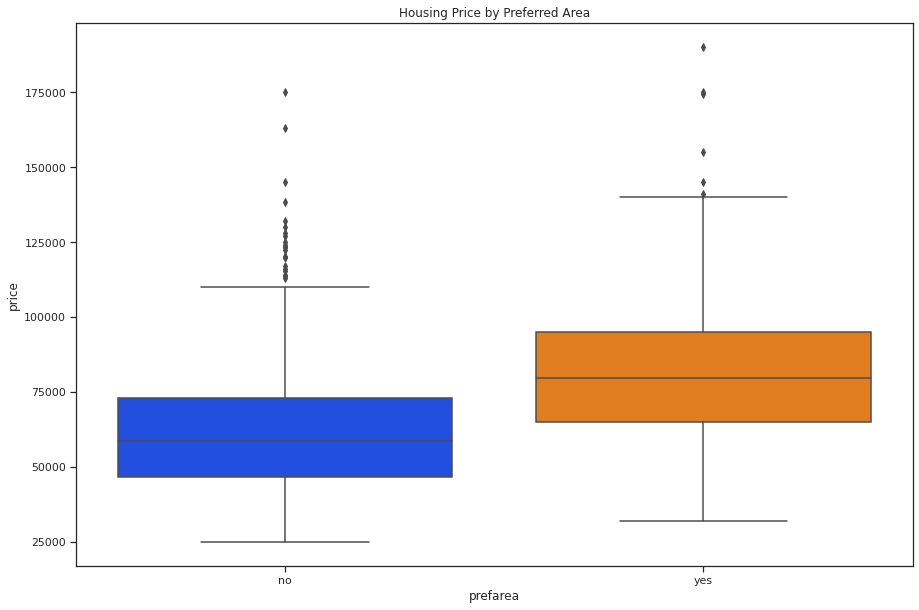

In [20]:
# OBSERVE

plt.figure(figsize=(15,10))
sns.set(style="ticks", palette="bright")
sns.boxplot(x='prefarea',
               y='price', 
              data=housing) 
 
plt.title('Housing Price by Preferred Area')

**NOTE:** Additional steps might be needed to select the best model and combination of variables - those steps are NOT reviewed in this sample code - consider the steps you might need to take for model evaluation (training/test set); variable selection; feature engineering; etc.

Second attempt at a model with a different library.

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

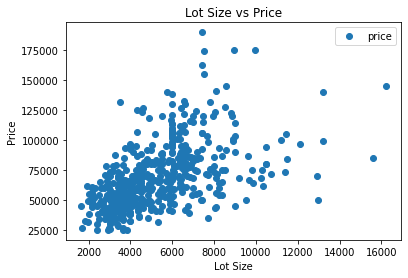

In [9]:
# EXPLORE

housing.plot(x='lotsize', y='price', style='o')  
plt.title('Lot Size vs Price')  
plt.xlabel('Lot Size')  
plt.ylabel('Price')  
plt.show()

In [0]:
# SCRUB

X = housing['lotsize'].values.reshape(-1,1)
y = housing['price'].values.reshape(-1,1)

In [0]:
# SCRUB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# MODEL

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# ANALYZE

print(regressor.intercept_)

print(regressor.coef_)

[32139.51578209]
[[7.00022888]]


In [19]:
model_2 = str('price ~ lotsize')
model_2_fit = smf.ols(model_2, data = housing).fit()
print(model_2_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     219.1
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           6.77e-42
Time:                        00:17:27   Log-Likelihood:                -6247.0
No. Observations:                 546   AIC:                         1.250e+04
Df Residuals:                     544   BIC:                         1.251e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.414e+04   2491.064     13.703      0.0

How do the models compare?  Is this a fair comparison?